### 视觉错觉分析案例

In [2]:
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

from numba import jit
from numba import vectorize
from numpy import arange
import cv2

/usr/local/lib/python2.7/dist-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


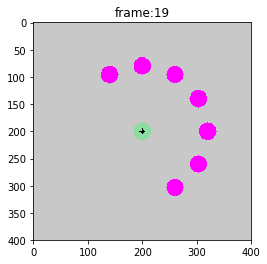

In [3]:
#
color0=(255,0,255);
color1=(140,220,160);
colorB=(200,200,200);
height, width = 400, 400
img = np.zeros((height, width, 3), np.uint8)
img[:,:,0:3]=colorB[0:4];
fig = plt.figure();

@jit
def f(i):
    global img, row, col
    img[:,:,0:3]=colorB[0:4];
    
    cv2.circle(img,(width/2-0,height/2-0,),16,color1, -1);
    cv2.line(img,(width/2-5,height/2),(width/2+5,height/2),(0,0,0),1)
    cv2.line(img,(width/2,height/2-5),(width/2,height/2+5),(0,0,0),1)
    cv2.rectangle(img,(width/2-2,height/2-2),(width/2+2,height/2+2),(0,0,0),1)
    
    for x in xrange(12):
        i_m=((i+x)%12)
        pos=(np.int(width/2+120*np.cos(x/6.0*np.pi)),np.int(height/2-120*np.sin(x/6.0*np.pi)));
        if(False and i_m==0):
            color_r=tuple(np.dot(np.asarray([color0,color1]).transpose(),[0.2,0.8]))
            cv2.circle(img,pos, 16, color_r, -1)
        if(i_m>4):
            cv2.circle(img,pos, 16, color0, -1)
        #cv2.putText(img,str(i_m),(pos[0]-7,pos[1]+5),2,0.5,(0,0,0),2)
    return img

im = plt.imshow(img, animated=True)
def updatefig(i):
    im.set_array(f(i))
    plt.title(''.join(['frame:',str(i)]))
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=20,interval=500, blit=True)
ani.save('test_animation.gif',writer='imagemagick')

### 测试前景色,背景色如何影响反色

In [6]:
#color0=(255,0,255);color1=(140,220,160);colorB=(200,200,200);   #原始颜色

#color0=(255,0,255);color1=(240,220,160);colorB=(250,200,200);   #提高背景R，转换颜色R上升

#color0=(255,0,255);color1=(150,220,220);colorB=(200,200,250);   #提高背景B，转换颜色B上升

#color0=(255,0,255);color1=(180,210,0);colorB=(200,200,50);      #降低背景B，转换颜色B下降

#color0=(255,0,255);color1=(130,100,160);colorB=(200,50,200);    #降低背景G，转颜色B下降

color0=(255,0,255);color1=(140,220,160);colorB=(100,100,100);    

### 测试人眼条件反射的情况

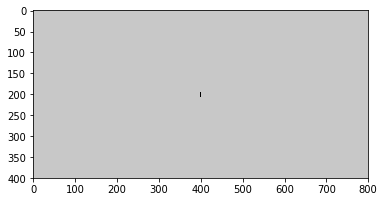

In [4]:
#
color0=(255,0,255);
color1=(140,220,160);
colorB=(200,200,200);
height, width = 400, 800
img = np.zeros((height, width, 3), np.uint8)
img[:,:,0:3]=colorB[0:4];
fig = plt.figure();

@jit
def f(i):
    global img, row, col
    img[:,:,0:3]=colorB[0:4];
    
    cv2.line(img,(width/2-5,height/2),(width/2+5,height/2),(0,0,0),1)
    cv2.line(img,(width/2,height/2-5),(width/2,height/2+5),(0,0,0),1)
    
    i_m=((i)%3)
    
    if(i_m>=1):
        cv2.circle(img,(width/2-100,height/2-0,),20,color0, -1);
        cv2.circle(img,(width/2+100,height/2-0,),50,color1, -1);
    
    return img

im = plt.imshow(img, animated=True)
def updatefig(i):
    im.set_array(f(i))
    #plt.title(''.join(['frame:',str(i)]))
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=1000,interval=500, blit=True)


### 艰难无比